## COMP5712M: Programming for Data Science

## Group project: Data Analysis Project


# _Project Title_ - Comparision and Benefit Analysis of Different Class Balancing Techniques on Imbalanced Pneumonia X-ray Image Dataset.


_Give names and emails of group members here:_

* _Harshit Mittal_, _zqnw0183@leeds.ac.uk_
* _Rushikesh Kothawade_, _rrtq0904@leeds.ac.uk_
* _Ritish Nanjesh_, _knsl0959@leeds.ac.uk_
* _Debasmita Roy_, _btxc0793@leeds.ac.uk_

# Project Plan

## The Data (10 marks)

_The Dataset used in this project is borrowed from the Group of Mendeley Data:_

https://data.mendeley.com/datasets/rscbjbr9sj/2

_The images present in original dataset represents chest x-rays of patients classified into "Normal" and "Pneumonia", containing the total of 5863 images in JPEG format. These chest x-rays as stated in source site were selected from children aged one to five years old from a chinese hospital. All the images areare quality controlled by removing all unreadable scans and then images were classified by professional physicians._

_Although the dataset passes all quality control tests it holds a major problem of class imbalance where "Pneumonia" class holds three times more dataset as compared to "Normal" class._

_This project uses 10% of entire dataset which mantains the same issue to control the computation limits. In the current version, our team kept "Normal" dataset with 134 images and "Pneumonia" one with 387 images containing total of 521 images. Our version of dataset is accessible at:_

https://drive.google.com/drive/folders/1_PEjG-G-r5NzV9bSXvW2v1IFZJcg6yW_?usp=sharing

## Project Aim and Objectives (5 marks)

_In this project we tend to solve the problem of imbalanced classes in the Pneumonia dataset and compare different techniques to solve the imbalancy in the classes, this result will provide us base for the future of different techniques and provide us with their efficency. There are various objectives we hold in our dataset such as:_

* _Vectorization of Images: One of our objectives is to turn the images into much simpler format to handle and apply techniques on them. This method provides images in much simpler format._

* _Applying various techniques: This step applies different techniques on the dataset to create more images or handl the size of classes to provide equal dataset to the deep learning model._

* _Comparing results: Compare all the results on both dataset enhanced by different techniquesand one without any techniques._

### Specific Objective(s)

* __Objective 1:__ _Visualize the original dataset, modify it to vectors and calculate final results on deep learning model without any changes._
* __Objective 2:__ _Apply simpler techniques like Upscaling the number of images by copying existing one in minor class and reducing by deleting extra ones in major class._
* __Objective 3:__ _Apply complex techniques like SMOTE and ADASYN on the dataset._
* __Objective 4:__ _Train all modified version on deep learning models and accumulate results._

## System Design (5 marks)

_Describing code in terms of the
following two sections._

### Architecture

__Data Visualization__ --> __Data Vectorization__ --> __Original Data Split__ --> __Deep Learning Model Creation__ --> __Original Data Training and Model Testing__--> __Simpler Techniques Application__ --> __Complex Techniques Application__ --> __Training all Modified Datasets__ --> __Result Comparision__.
  
_Here different steps has been followed first original data and its results on deep learning techniques are evaluated and then furthur simple and complex techniques are applied and further their results are compared._
### Processing Modules and Algorithms

 * __Data Visualization:__ _In this the target is to visualize and explain the problems using matplotlib and other techniques._

 * __Data Vectorization:__ _Converting data images into vectors format using Convolutional Neural Networks and flatten them._

 * __Class Balancing Functions:__ _Providing functions and steps for techniques like SMOTE, upscaling, descaling and ADASYN._

 * __Deep Learning Model:__ _Creating a model to train all the set of datasets and evaluate their results._

# Program Code (15 marks)

#**__Objective 1 --> Code:__**

_In the cell below drive is extracted in the google colab where the dataset is present: (Link is provided for drive folder above)_

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


_In the cell below the extracted data is set as variable, all the images are uniformed to size (128,128), and size of Normal and Pneumonia Folders are calculated._

In [ ]:
from glob import glob
import os
Dir = "/content/drive/MyDrive/PDS Project/train_10pct"
IMG_SIZE = (128,128)

normal_I = glob(os.path.join(Dir, "NORMAL","*"))
pneum_I = glob(os.path.join(Dir, "PNEUMONIA","*"))

print("Number of Normal Images: ", len((normal_I)) )
print("Number of Pneumonia Images: ", len((pneum_I)))
set1 = normal_I + pneum_I
print("Number of Images: ", len((set1)))

Number of Normal Images:  134
Number of Pneumonia Images:  387
Number of Images:  521


_In the code below two functions are applied on original data, first function build_feature_extractor provides structure of Convolutional Layers model to vectorize the images, and function two load images, make it to appropriate format, apply function and flatten the vectors, and furthur dividing whole data into X(vectors) and y(labels)._

In [ ]:
import numpy as np
import random
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras import layers, models

def build_feature_extractor(input_shape=(128,128,3)):
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=input_shape),
        layers.MaxPooling2D(),

        layers.Flatten()
    ])

    return model

feature_extractor = build_feature_extractor((IMG_SIZE[0], IMG_SIZE[1], 3))
feature_extractor.summary()

def vectorize_images(paths, img_size=IMG_SIZE):
    vectors = []
    labels = []

    for p in paths:
        img = load_img(p, target_size=img_size)
        arr = img_to_array(img) / 255.0
        arr = tf.expand_dims(arr, axis=0)

        feat = feature_extractor(arr).numpy().flatten()

        vectors.append(feat)
        labels.append(os.path.basename(os.path.dirname(p)))

    return np.array(vectors), np.array(labels)


X, y = vectorize_images(set1)


print("Data feature shape:", X.shape)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

Data feature shape: (521, 131072)


_The original data is divided in three classes val, train and test. Where val has been alloted 16 images and test has been alloted 68 images._

In [ ]:
indices = np.arange(len(X))
np.random.shuffle(indices)

X = X[indices]
y = y[indices]

VAL_SIZE  = 16
TEST_SIZE = 68

X_val = X[:VAL_SIZE]
y_val = y[:VAL_SIZE]

X_test = X[VAL_SIZE : VAL_SIZE + TEST_SIZE]
y_test = y[VAL_SIZE : VAL_SIZE + TEST_SIZE]

X_train = X[VAL_SIZE + TEST_SIZE :]
y_train = y[VAL_SIZE + TEST_SIZE :]

_In the below cell the deep Learning model is defined using tensorflows models class it contains two layers of 512 neurons and 256 neurons respectively followed by output layer. Further it is compiled on adam optimizer,binary crossentropy._

_Some necessary explainations:_

__RELU:__ _Rectified Linear Unit(RELU) is a non-linear activation function, it just converts all negative x values into 0 and keeping positive values same, making formula max(x,0)._

__Sigmoid:__ _Sigmoid Function is a s-shaped non-linear activation function, it just converts all values into two values of its end._

__ADAM:__ _ADAM optimizer changes the learning rate with respect to how near it is to goal._

__Binary Cross Entropy:__ _This is the loss function used specifically to train binary classes._

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_dim):
    model = models.Sequential([
        layers.Dense(512, activation='relu', input_shape=(input_dim,)),
        layers.Dropout(0.3),
        layers.Dense(256, activation='relu'),
        layers.Dropout(0.2),
        layers.Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer='adam',
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    return model

_In the cell below a function is provided where furthur specifications are provided like epochs (number of training steps), batch_size which define group of individual data taken and saved as history._

In [ ]:
def train_model(X_train, y_train, X_val, y_val, title):
    print("\nTraining on:", title)

    model = build_model(X_train.shape[1])

    history = model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,
        batch_size=32,
        verbose=1
    )
    return model, history

_Functions is provided to plot loss and accuracy graphs for training of original data on deep learning method._

In [ ]:
import matplotlib.pyplot as plt

def plot_training(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(12,5))

    plt.subplot(1,2,1)
    plt.plot(acc, label='Train Accuracy')
    plt.plot(val_acc, label='Val Accuracy')
    plt.title(title + " - Accuracy")
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(loss, label='Train Loss')
    plt.plot(val_loss, label='Val Loss')
    plt.title(title + " - Loss")
    plt.legend()

    plt.show()

_Function to evaluate the trained model on test set and providing classification report to analyze the result of evaluation._

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

def evaluate_model(model, X_test, y_test, title):
    print("\nEvaluation:", title)

    preds = model.predict(X_test).ravel()
    preds_bin = (preds > 0.5).astype(int)

    print("\nClassification Report:")
    print(classification_report(y_test, preds_bin, target_names=['NORMAL', 'PNEUMONIA']))


_y is encoded from strings to binary numbers from Normal to 0 and Pneumonia as 1_

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

y_train_enc = le.fit_transform(y_train)
y_val_enc   = le.transform(y_val)
y_test_enc  = le.transform(y_test)

_Original model is trained and evaluated below using above stated functions._


Training on: Original


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - accuracy: 0.6131 - loss: 6.0897 - val_accuracy: 0.6875 - val_loss: 2.1261
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6711 - loss: 1.9612 - val_accuracy: 0.9375 - val_loss: 0.3508
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.6865 - loss: 1.1373 - val_accuracy: 0.9375 - val_loss: 0.2779
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7583 - loss: 0.8005 - val_accuracy: 0.8750 - val_loss: 0.3334
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.7751 - loss: 0.6375 - val_accuracy: 0.9375 - val_loss: 0.2121
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8287 - loss: 0.3626 - val_accuracy: 0.8125 - val_loss: 0.3907
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8032 - loss: 0.4780 - val_accuracy: 0.9375 - val_loss: 0.2128
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.8789 - loss: 0.2789 - val_accuracy: 0.8750 - 

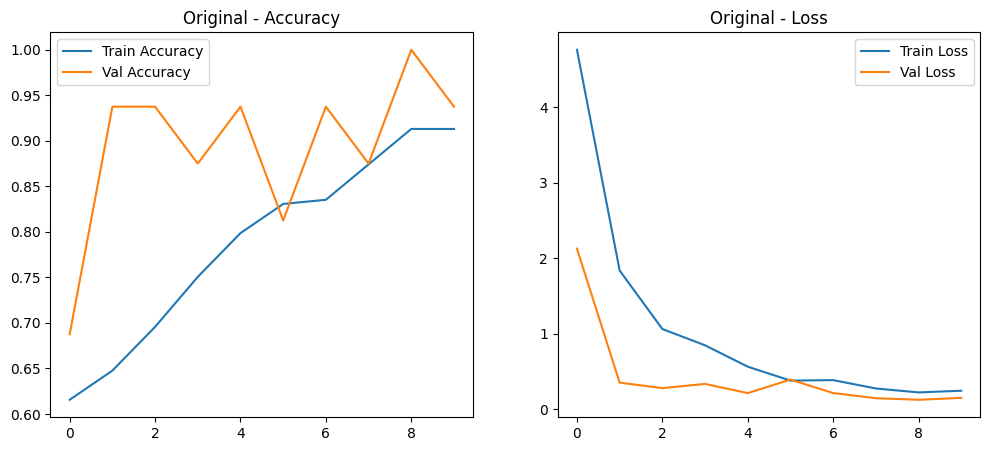


Evaluation: Original
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 282ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.95      0.93        21
   PNEUMONIA       0.98      0.96      0.97        47

    accuracy                           0.96        68
   macro avg       0.94      0.95      0.95        68
weighted avg       0.96      0.96      0.96        68



In [ ]:
model_orig, hist_orig = train_model(X_train, y_train_enc, X_val, y_val_enc, "Original")
plot_training(hist_orig, "Original")
evaluate_model(model_orig, X_test, y_test_enc, "Original")

#**__Objective 2 --> Code:__**

__Oversampling Minority:__ _In the below cell we oversampled or increased the number of images in minority class or "Normal" class by creating copying existing images._  

In [ ]:
classes, counts = np.unique(y, return_counts=True)
max_count = counts.max()

X_over = X.tolist()
y_over = y.tolist()

for c in classes:
    count = np.where(y == c)[0]
    diff = max_count - len(count)

    if diff > 0:
        ind = np.random.choice(count, diff, replace=True)
        for i in ind:
            X_over.append(X[i])
            y_over.append(y[i])

X_over = np.array(X_over)
y_over = np.array(y_over)

print(X_over.shape)
print(y_over.shape)

(774, 131072)
(774,)


__Downsampling Minority:__ _In the below cell we downsampled or decreased the number of images in majority class or "Pneumonia" class by deleting some images._

In [ ]:
classes, counts = np.unique(y, return_counts=True)
min_count = counts.min()

X_under = []
y_under = []

for c in classes:
    count = np.where(y == c)[0]
    ind = np.random.choice(count, min_count, replace=False)
    X_under.extend(X[ind])
    y_under.extend(y[ind])

X_under = np.array(X_under)
y_under = np.array(y_under)

print(X_under.shape)
print(y_under.shape)

(268, 131072)
(268,)


#**__Objective 3 --> Code:__**

__SMOTE (Synthetic Minority Over-sampling Technique):__ _Instead of simply
copying existing samples, SMOTE generates new synthetic samples by finding similar minority class instances and creating new points between them. This approach helps the model better learn patterns in the minority class without overfitting to repeated examples. Here we used imblearn library to define SMOTE function._

In [ ]:
from imblearn.over_sampling import SMOTE

def apply_smote(X, y):
    sm = SMOTE()
    X_res, y_res = sm.fit_resample(X, y)
    return X_res, y_res

X_smote, y_smote = apply_smote(X, y)
print("After SMOTE:", X_smote.shape)

After SMOTE: (774, 131072)


__ADASYN (Adaptive Synthetic Sampling):__ _It focuses on generating more synthetic samples in regions where the minority class is hardest to learn.
ADASYN helps the model better understand the tricky edge cases and boundary regions, especially in complex, real-world scenarios._

In [ ]:
from imblearn.over_sampling import ADASYN

def apply_adasyn(X, y):
    ada = ADASYN()
    X_res, y_res = ada.fit_resample(X, y)
    return X_res, y_res

X_ada, y_ada = apply_adasyn(X, y)
print("After ADASYN:", X_ada.shape)

After ADASYN: (783, 131072)


#**__Objective 4 --> Code:__**

__Data and Result Evaluation:__ _Here we used similar code as in Objective 1 to train dataset and evaluate results._

_In the set of codes below we first distributed oversampled data in train, test and validation dataset. Then encoded target set into binary numbers and trained it on similar models as of original._

In [ ]:
indices = np.arange(len(X_over))
np.random.shuffle(indices)

X_over = X_over[indices]
y_over = y_over[indices]

VAL_SIZE  = 16
TEST_SIZE = 68

X_val1 = X_over[:VAL_SIZE]
y_val1 = y_over[:VAL_SIZE]

X_test1 = X_over[VAL_SIZE : VAL_SIZE + TEST_SIZE]
y_test1 = y_over[VAL_SIZE : VAL_SIZE + TEST_SIZE]

X_train1 = X_over[VAL_SIZE + TEST_SIZE :]
y_train1 = y_over[VAL_SIZE + TEST_SIZE :]

In [ ]:
le = LabelEncoder()

y_train_enc1 = le.fit_transform(y_train1)
y_val_enc1   = le.transform(y_val1)
y_test_enc1  = le.transform(y_test1)


Training on: Oversampled


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 5s 126ms/step - accuracy: 0.5035 - loss: 5.3824 - val_accuracy: 0.5000 - val_loss: 1.8734
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.5670 - loss: 1.8496 - val_accuracy: 0.7500 - val_loss: 0.5571
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7005 - loss: 0.9500 - val_accuracy: 0.8750 - val_loss: 0.3258
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8538 - loss: 0.3399 - val_accuracy: 0.8750 - val_loss: 0.2909
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8756 - loss: 0.3051 - val_accuracy: 1.0000 - val_loss: 0.0671
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8966 - loss: 0.2799 - val_accuracy: 0.9375 - val_loss: 0.0758
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9452 - loss: 0.1539 - val_accuracy: 1.0000 - val_loss: 0.0261
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9657 - loss: 0.1077 - val_accuracy: 1.0000 - 

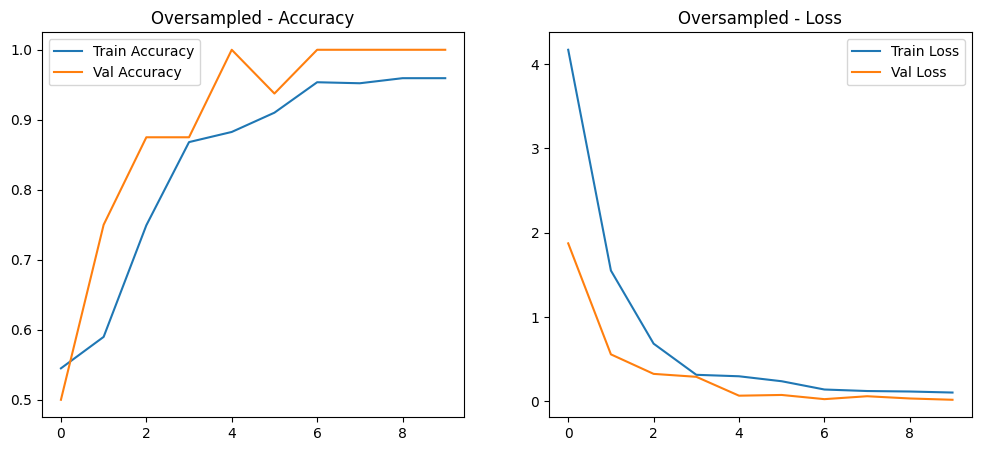


Evaluation: Oversampled
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 141ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.96      0.96        27
   PNEUMONIA       0.98      0.98      0.98        41

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [ ]:
model_over, hist_over = train_model(X_train1, y_train_enc1, X_val1, y_val_enc1, "Oversampled")
plot_training(hist_over, "Oversampled")
evaluate_model(model_over, X_test1, y_test_enc1, "Oversampled")

_In the set of codes below we first distributed undersampled data in train, test and validation dataset. Then encoded target set into binary numbers and trained it on similar models as of original._

In [ ]:
indices = np.arange(len(X_under))
np.random.shuffle(indices)

X = X_under[indices]
y = y_under[indices]

VAL_SIZE  = 16
TEST_SIZE = 68

X_val2 = X[:VAL_SIZE]
y_val2 = y[:VAL_SIZE]

X_test2 = X[VAL_SIZE : VAL_SIZE + TEST_SIZE]
y_test2 = y[VAL_SIZE : VAL_SIZE + TEST_SIZE]

X_train2 = X[VAL_SIZE + TEST_SIZE :]
y_train2 = y[VAL_SIZE + TEST_SIZE :]

In [ ]:
le = LabelEncoder()

y_train_enc2 = le.fit_transform(y_train2)
y_val_enc2   = le.transform(y_val2)
y_test_enc2  = le.transform(y_test2)


Training on: UnderSample


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 5s 491ms/step - accuracy: 0.5327 - loss: 7.0685 - val_accuracy: 0.8125 - val_loss: 0.3961
Epoch 2/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.5528 - loss: 3.5698 - val_accuracy: 0.7500 - val_loss: 0.5968
Epoch 3/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5695 - loss: 3.0158 - val_accuracy: 0.7500 - val_loss: 0.4149
Epoch 4/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6240 - loss: 1.9569 - val_accuracy: 0.5000 - val_loss: 2.2250
Epoch 5/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5438 - loss: 2.1613 - val_accuracy: 0.7500 - val_loss: 0.6650
Epoch 6/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6863 - loss: 1.0196 - val_accuracy: 0.8750 - val_loss: 0.2976
Epoch 7/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.6680 - loss: 1.2341 - val_accuracy: 0.8750 - val_loss: 0.2507
Epoch 8/10
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.7267 - loss: 0.7810 - val_accuracy: 0.8750 - val_loss: 0.2725

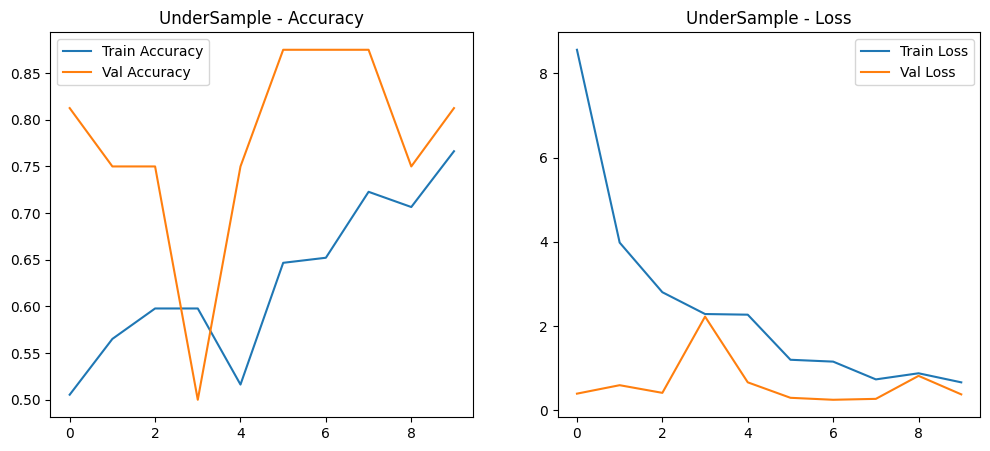


Evaluation: UnderSample


1/3 ━━━━━━━━━━━━━━━━━━━━ 0s 220ms/step

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       1.00      0.44      0.61        43
   PNEUMONIA       0.51      1.00      0.68        25

    accuracy                           0.65        68
   macro avg       0.76      0.72      0.64        68
weighted avg       0.82      0.65      0.64        68



In [ ]:
model_orig2, hist_orig2 = train_model(X_train2, y_train_enc2, X_val2, y_val_enc2, "UnderSample")
plot_training(hist_orig2, "UnderSample")
evaluate_model(model_orig2, X_test2, y_test_enc2, "UnderSample")

_In the set of codes below we first distributed SMOTE data in train, test and validation dataset. Then encoded target set into binary numbers and trained it on similar models as of original._

In [ ]:
indices = np.arange(len(X_smote))
np.random.shuffle(indices)

X = X_smote[indices]
y = y_smote[indices]

VAL_SIZE  = 16
TEST_SIZE = 68

X_val3 = X[:VAL_SIZE]
y_val3 = y[:VAL_SIZE]

X_test3 = X[VAL_SIZE : VAL_SIZE + TEST_SIZE]
y_test3 = y[VAL_SIZE : VAL_SIZE + TEST_SIZE]

X_train3 = X[VAL_SIZE + TEST_SIZE :]
y_train3 = y[VAL_SIZE + TEST_SIZE :]

In [ ]:
le = LabelEncoder()

y_train_enc3 = le.fit_transform(y_train3)
y_val_enc3   = le.transform(y_val3)
y_test_enc3  = le.transform(y_test3)

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training on: SMOTE
Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 156ms/step - accuracy: 0.5326 - loss: 6.0844 - val_accuracy: 0.6875 - val_loss: 0.8238
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.7055 - loss: 1.3515 - val_accuracy: 0.7500 - val_loss: 0.8120
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7824 - loss: 0.6905 - val_accuracy: 0.8750 - val_loss: 0.4435
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8493 - loss: 0.3928 - val_accuracy: 0.8125 - val_loss: 0.3943
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8846 - loss: 0.3268 - val_accuracy: 0.8125 - val_loss: 0.2373
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9216 - loss: 0.2334 - val_accuracy: 0.8125 - val_loss: 0.3289
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9354 - loss: 0.1851 - val_accuracy: 0.9375 - val_loss: 0.1514
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9456 - loss: 0.1882 - val

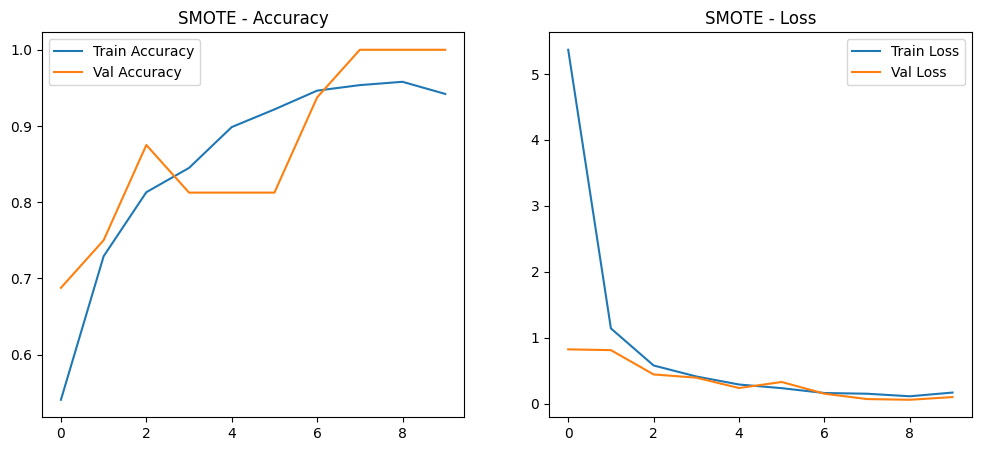


Evaluation: SMOTE
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.96      0.96        28
   PNEUMONIA       0.97      0.97      0.97        40

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [ ]:
model_orig3, hist_orig3 = train_model(X_train3, y_train_enc3, X_val3, y_val_enc3, "SMOTE")
plot_training(hist_orig3, "SMOTE")
evaluate_model(model_orig3, X_test3, y_test_enc3, "SMOTE")

_In the set of codes below we first distributed ADASYN data in train, test and validation dataset. Then encoded target set into binary numbers and trained it on similar models as of original._

In [ ]:
indices = np.arange(len(X_ada))
np.random.shuffle(indices)

X = X_ada[indices]
y = y_ada[indices]

VAL_SIZE  = 16
TEST_SIZE = 68

X_val4 = X[:VAL_SIZE]
y_val4 = y[:VAL_SIZE]

X_test4 = X[VAL_SIZE : VAL_SIZE + TEST_SIZE]
y_test4 = y[VAL_SIZE : VAL_SIZE + TEST_SIZE]

X_train4 = X[VAL_SIZE + TEST_SIZE :]
y_train4 = y[VAL_SIZE + TEST_SIZE :]

In [ ]:
le = LabelEncoder()

y_train_enc4 = le.fit_transform(y_train4)
y_val_enc4   = le.transform(y_val4)
y_test_enc4  = le.transform(y_test4)


Training on: ADASYN


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - accuracy: 0.5112 - loss: 6.4453 - val_accuracy: 0.6250 - val_loss: 1.9214
Epoch 2/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.5758 - loss: 2.6136 - val_accuracy: 0.5000 - val_loss: 0.9028
Epoch 3/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.7409 - loss: 0.6567 - val_accuracy: 0.8750 - val_loss: 0.3174
Epoch 4/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.8222 - loss: 0.4150 - val_accuracy: 0.8125 - val_loss: 0.3526
Epoch 5/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.8993 - loss: 0.2527 - val_accuracy: 0.8750 - val_loss: 0.2278
Epoch 6/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9396 - loss: 0.1757 - val_accuracy: 1.0000 - val_loss: 0.1196
Epoch 7/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.9623 - loss: 0.1426 - val_accuracy: 1.0000 - val_loss: 0.1031
Epoch 8/10
22/22 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.9512 - loss: 0.1473 - val_accuracy: 0.8750 - 

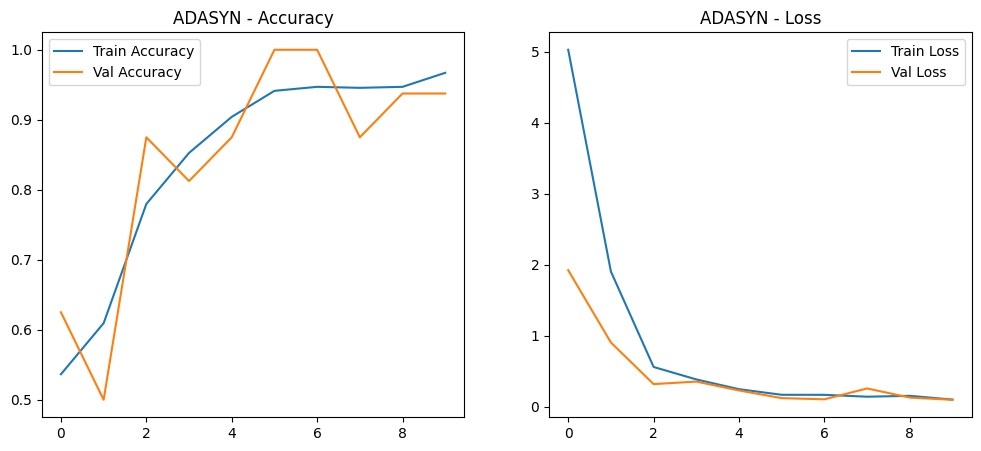


Evaluation: ADASYN
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      1.00      0.99        38
   PNEUMONIA       1.00      0.97      0.98        30

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68



In [ ]:
model_orig4, hist_orig4 = train_model(X_train4, y_train_enc4, X_val4, y_val_enc4, "ADASYN")
plot_training(hist_orig4, "ADASYN")
evaluate_model(model_orig4, X_test4, y_test_enc4, "ADASYN")

# Project Outcome (10 + 10 marks)

## Overview of Results

## Objective 1

### Explanation of Results
_The results in Objective 1 states that:_
* _The data isn't divided in uniform way, where "Pneumonia" class contains 74.3% data with 387 images whereas "Normal" class stores only 25.7% data with 134 images._
* _It also shows successful conversion of images to vectors using Convolution layers and encoding of target class to binary integers._
* _The trained model on this version shows good accuracy but holds good difference between f1-score and precision of each class of about ~7% and ~4% showcasing the overtraining on "Pneumonia" class._

### Visualisation
_The charts, diagrams and classification report successfully showcases the entire problem in the processing of original dataset that are:_
* _From pie chart we visualized huge class gap between the number of images in both of the classes._
* _Different dimensionality of images are also viewed which are further converted to the uniform size of (128,128)._
* _Further from classification report a gap of around ~7% and ~4% is observed in both precision and f1-score in both the classes. These gaps shows overtraining of a sinle class._

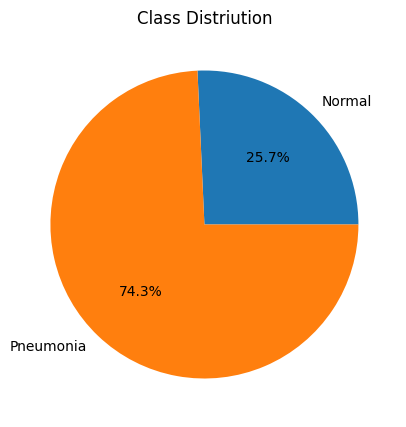

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(5,5))
plt.pie([len(normal_I), len(pneum_I)], labels=["Normal", "Pneumonia"], autopct='%1.1f%%')
plt.title("Class Distriution")
plt.show()

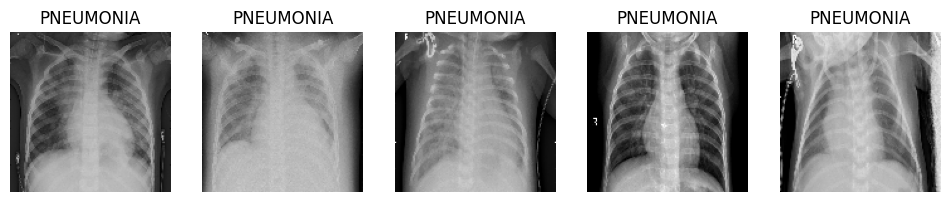

In [ ]:
import random
from tensorflow.keras.preprocessing.image import load_img, img_to_array
plt.figure(figsize=(12,3))
for i, img_path in enumerate(random.sample(normal_I+pneum_I,5)):
  plt.subplot(1, 5, i+1)
  plt.imshow(load_img(img_path, target_size=(128,128)))
  plt.title(os.path.basename(os.path.dirname(img_path)))
  plt.axis("off")
plt.show()

In [ ]:
print(X[0])
print(y[0])

[0.02381885 0.         0.02938592 ... 0.0011581  0.00236907 0.0008335 ]
PNEUMONIA


In [ ]:
evaluate_model(model_orig, X_test, y_test_enc, "Original")


Evaluation: Original
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.91      0.95      0.93        21
   PNEUMONIA       0.98      0.96      0.97        47

    accuracy                           0.96        68
   macro avg       0.94      0.95      0.95        68
weighted avg       0.96      0.96      0.96        68



## Objective 2
### Explanation of Results
_In this objective we were able to successfully counter the imbalanced classes by oversampling minority and downsampling majority. We are able to generate 387 imges in each class in oversampling of majority and 134 images in both the classes in downsampling majority._

_Expectations: In the OverSampling it is expected to show good accuracy with a little bit of overtraining due to multiple copies of similar minority class images. Whereas in downSampling it is expected to show really low accuracy due to loss of information of majority class._

### Visualisation
_In the below bar graphs, we see the classes became balanced where oversampling one hold 387 images each class and downsampling one hold 134 images each. The classes in both classes are perfectly balanced with the help of multiple images._

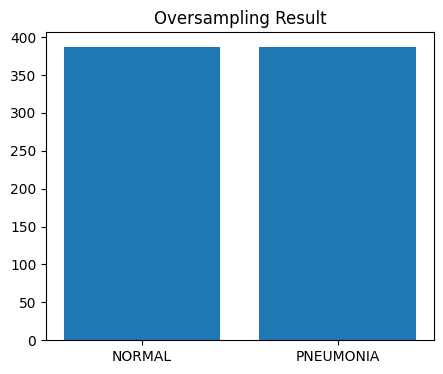

In [ ]:
def plot_resampled_dist(y, title):
    unique, counts = np.unique(y, return_counts=True)
    plt.figure(figsize=(5,4))
    plt.bar(unique, counts)
    plt.title(title)
    plt.show()

plot_resampled_dist(y_over, "Oversampling Result")

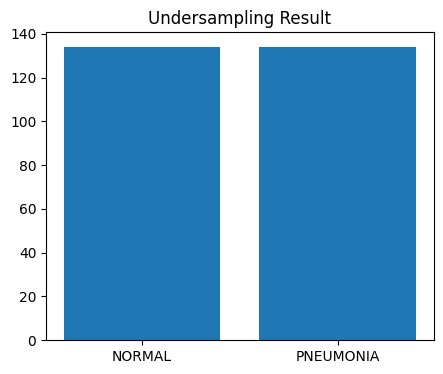

In [ ]:
plot_resampled_dist(y_under, "Undersampling Result")

## Objective 3
### Explanation of Results

_Looking at our resampling results, we can see how both SMOTE and ADASYN have successfully addressed the class imbalance problem in our pneumonia detection dataset. The visualizations clearly demonstrate that both techniques have achieved balance between the NORMAL and PNEUMONIA classes._

_Starting from our original imbalanced dataset, SMOTE produced 774 total samples while ADASYN generated 766 samples. The slight difference in final counts reflects ADASYN's adaptive nature, it generates samples based on the difficulty of learning in different regions, which sometimes results in fewer synthetic samples compared to SMOTE's more uniform approach._

_Expectation: It is expected both SMOTE and ADASYN will show better and more stable results than original one._

### Visualisation

_The bar charts for both techniques show nearly identical class distributions, which is exactly what we want when tackling imbalanced data. This balanced distribution means our machine learning model will no longer be biased towards predicting the majority class (NORMAL) and will have sufficient examples to learn the patterns effectively._

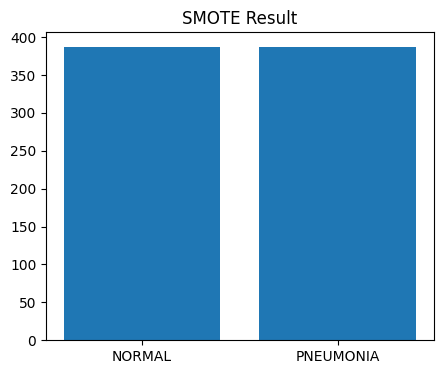

In [ ]:
plot_resampled_dist(y_smote, "SMOTE Result")

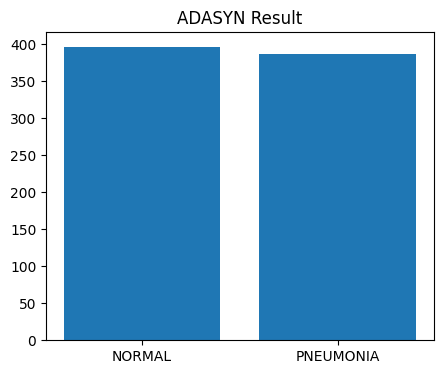

In [ ]:
plot_resampled_dist(y_ada, "ADASYN Result")

## Objective 4
### Explanation of Results
__This objective compares all modified versions with balanced classes:__ _All the datasets were trained to the model similar to original one. The oversampling of minority showed better results than original dataset with ~1% more accuracy and only a difference of ~2% difference in precision, recall and f1-score. Further, the Downsampling of Majority class showed results as expected by degrading the accuracy about ~30% and huge gaps in recall, precision and f1-score. The SMOTE one showed really good results with accuracy equal to oversampling and only ~1% difference in recall, precision and f1-score which is best in all results. ADASYN showed huge increase in accuracy of around ~3% from original and gap of ~3% in recall, precision and f1-score, which is still ~1% less than original one._

### Visualisation
_In the graphs of training of Original and undersample dataset shows fluctuations showing lack of data and overtraining on certain dataset. Whereas graphs in Oversample, SMOTE and ADASYN showed much stable training and loss graphs. From the results we also able to view that there is overtraining in Original dataset which was handled appreciatly in all balancing functions except Undersampling which showed much worse results.

In [ ]:
evaluate_model(model_over, X_test1, y_test_enc1, "Oversampled")


Evaluation: Oversampled
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.96      0.96        27
   PNEUMONIA       0.98      0.98      0.98        41

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [ ]:
evaluate_model(model_orig2, X_test2, y_test_enc2, "UnderSample")


Evaluation: UnderSample
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       1.00      0.44      0.61        43
   PNEUMONIA       0.51      1.00      0.68        25

    accuracy                           0.65        68
   macro avg       0.76      0.72      0.64        68
weighted avg       0.82      0.65      0.64        68



In [ ]:
evaluate_model(model_orig3, X_test3, y_test_enc3, "SMOTE")


Evaluation: SMOTE
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.96      0.96      0.96        28
   PNEUMONIA       0.97      0.97      0.97        40

    accuracy                           0.97        68
   macro avg       0.97      0.97      0.97        68
weighted avg       0.97      0.97      0.97        68



In [ ]:
evaluate_model(model_orig4, X_test4, y_test_enc4, "ADASYN")


Evaluation: ADASYN
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.97      1.00      0.99        38
   PNEUMONIA       1.00      0.97      0.98        30

    accuracy                           0.99        68
   macro avg       0.99      0.98      0.99        68
weighted avg       0.99      0.99      0.99        68



# Conclusion (5 marks)

_In the conclusion we would like to define our achievements, limitations and future work as follows:_

### Achievements
_As we predicted, original data shows overtraining of major class over minor because there was gap of around ~7% in precision and ~4% in f1-score. The simple method of "oversampling by copying" also shows a bit of overtraining but result were highly appreciable where accuracy is enhanced and stability is also mantained. Although "downsampling of major class" lead to loss of all major information and made training much worse in stability as well as accuracy. More complex techniques like "SMOTE" and "ADASYN" showed good accuracy values, where SMOTE shows much higher stability compared to all other functions and ADASYN showed highest accuracy with little unstabilized values of recall and precision but much better than original data._

### Limitations

_Although the study showed successful results but the amount of dataset chosen also affected the training original data was much bigger. Also, in real life there are some limitations in these methods such as SMOTE and ADASYN create synthetic data by altering some values which may or may not create realistic images and create some problems in real-time analysis. Another limitation could be of using shorter dataset as it may provide less information and leave behind some major or rare cases but if being considered it may go over the computation power and lead to loss of results._

### Future Work

_In the future work we would like to obtain more diverse data and use much more complex disease with more effective outliers showing rare cases useful in medical image analysis. We will also consider using more complex techniques using Adaptive Sampling with clustering and also training our data on multiple diseases. We would also like to compare results in complex neural networks like VGG16, Mobilenet, and Resnet18._